# Workshop day 2 - data preparation

This script is used for breakout exercises during the workshop.
Make sure to run the code section 'Preparation' before starting the exercises, in order to load required packages and to load and prepare the dataset.

Run this code section before you start with any exercise in order to load required packages and to load and prepare the dataset.

### Import required packages
__Required packages:__ 
* numpy
* pandas  
* matplotlib

You can import packages using the 

    import

command. In this module, we are working primarily with **pandas**, which is the standard package in Python for data manipulation.

For visualization purposes, we will use **matplotlib** (the standard Python plotting library).

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Need to first run this line from the terminal: python -m pip install seaborn
pd.set_option('display.max.columns', 50)

from statsmodels.stats.weightstats import ztest
from scipy.stats import pointbiserialr

In [76]:
b = np.arange(7)
print(b)

[0 1 2 3 4 5 6]


### Load data

In [55]:
churn_df = pd.read_csv("bankingchurn_data_prep.csv")
print(churn_df.head())
print(churn_df['size_household'])

  contract_start contract_end date_of_birth gender             profession  \
0     23/05/2010          NaN    10/09/1990      M  Professional Services   
1     05/12/2009   27/05/2017    11/11/1985      W                    NaN   
2     29/11/2012          NaN    15/11/1992      M         Transportation   
3     23/07/2016          NaN    25/02/1994      W  Professional Services   
4     01/05/2011          NaN    27/05/1990      W               Research   

   size_household    ZIP segment  credit_rating  no_credit_rating_flag  \
0               1  76829      S2      89.568518                      0   
1               1  35104      S2      94.270507                      0   
2               1  63450      S2      93.030947                      0   
3               2   9573      S3            NaN                      1   
4               1  66916      S2      90.457664                      0   

   main_account_flag  online_banking_flag  tele_banking_flag  creditcard_flag  \
0          

As you can see, there are various NA values. Also, you should always ensure if columns have the proper data type (more on that in the field work exercises).

<a id='sec41'></a>
# Exercise 1: Eliminate outliers

### Clean variable last_balance from outliers
Visual inspection using a boxplot or a histogram.

    plt.hist()
    plt.boxplot()

Let's include two reference lines into the histogram to make potential outliers more visible (2 standard deviations away from the mean)

50163.49901697714
29405.029651477904


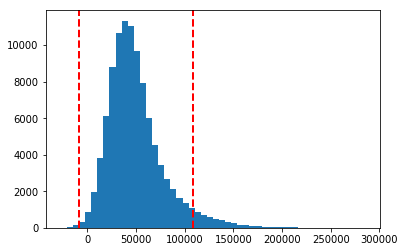

In [11]:
# Calculate mean and standard deviation of last_balance
mean = churn_df.last_balance.mean()
print(mean)
std = churn_df.last_balance.std()
print(std)

# Create the histogram of last_balance with two reference lines
plt.hist(churn_df.last_balance, bins = 50)
plt.axvline(mean - 2 * std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean + 2 * std, color='r', linestyle='dashed', linewidth=2)
plt.show()

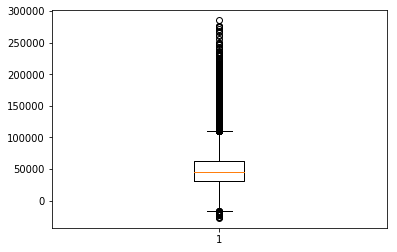

In [6]:
# Create the boxplot of last_balance
plt.boxplot(churn_df.last_balance)
plt.show()

#### Compare with quartiles
    describe(percentiles=[...]): you can define the percentiles which should be displayed in the summary analysis

In [7]:
# Use describe on last_balance with 1st, 5th, 25th, 50th, 75th, 95th and 99th percentiles
churn_df.last_balance.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count    100002.000000
mean      50163.499017
std       29405.029651
min      -27147.639430
1%         2096.960122
5%        13492.868775
25%       30887.902165
50%       44856.534740
75%       62538.245455
95%      106913.568525
99%      150192.665137
max      285314.507800
Name: last_balance, dtype: float64

#### Based on the analyses, select appropriate thresholds and exclude them
Be prepared to explain why you chose a specific value.

In [9]:
#TASK: replace the '?????' with appropriate thresholds 
#TASK: use the 2nd line of code if you want to filter out high and low outliers
data2 = churn_df.loc[churn_df.last_balance > 0]
#data2 = churn_df.loc[churn_df.last_balance.between(?????, ?????)]

50563.85762627418
29123.21761130785


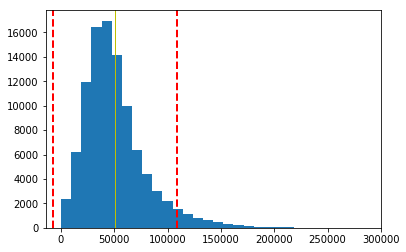

In [28]:
#Re-create the histogram to review the new distribution after cleaning
mean = data2.last_balance.mean()
print(mean)
std = data2.last_balance.std()
print(std)

# Create the histogram of last_balance with two reference lines
plt.hist(data2.last_balance, bins = 30)
plt.axvline(mean - 2 * std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean + 2 * std, color='r', linestyle='dashed', linewidth=2)
plt.axvline
plt.show()

<a id='sec43'></a>
### Exercise 2: Handling missing values
Most algorithms cannot deal with data gaps, like missing values or "errors". 
(meaning the information from the column is lost).

We have to decide what we do with missing values. Some options are: 
 - Exclude variables with NAs (e.g. using a threshold)
 - Removing rows with NAs 
 - Consider NAs as a separate catogory
 - Impute missing values with an aggregated value (e.g. mean, median, min, max)



#### Identify rows with missing values
     
     isna(): Check for missing values

In [20]:
# Count number of rows with missing values in each column
churn_na_list = churn_df.isna().sum()
print(churn_na_list.sort_values(ascending=False))

contract_end                         95131
credit_rating                        22484
profession                            7729
churn_flag                               0
tele_banking_flag                        0
portfolio_flag                           0
mortgage_flag                            0
insurance_other_flag                     0
insurance_car_flag                       0
insurance_house_flag                     0
insurance_life_flag                      0
creditcard_flag                          0
main_account_flag                        0
online_banking_flag                      0
last_balance_minus_6_months              0
no_credit_rating_flag                    0
segment                                  0
ZIP                                      0
size_household                           0
gender                                   0
date_of_birth                            0
last_balance                             0
last_balance_minus_12_months             0
number_of_r

contract_end     0.951291
credit_rating    0.224836
profession       0.077288
dtype: float64


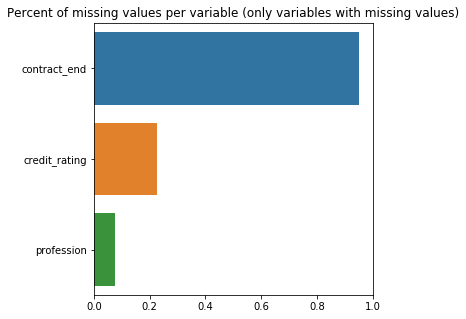

In [34]:
# Calculate the percentage of missingvalues for each column and assign to a data frame called 'missing_pct'
missing_pct = churn_df.isna().mean().sort_values(ascending=False)

# Filter 'missing_pct' for only columns which have any missing values
missing_pct = missing_pct[missing_pct > 0]

print(missing_pct)

# Plot 'missing_pct'
plt.figure(figsize=(5,5))
sns.barplot(x=missing_pct, y=missing_pct.index, ci=None).\
    set_title('Percent of missing values per variable (only variables with missing values)')
plt.show()

### Let's decide how to handle each of the 3 variables
#### Contract end
Variable contains the date a contract has ended.

Pick one of the following actions:

* Keep variable as is
* Remove variable
* Impute with median
* Encode missing values as separate value

#### Credit rating
Contains the credit rating (i.e., the probability of  fulfilling a credit) of the customer, if they have any. Values can range from 0 to 100.

count    77518.000000
mean        91.480888
std          5.668561
min         43.720633
25%         88.680541
50%         92.778048
75%         95.653172
max         99.495558
Name: credit_rating, dtype: float64

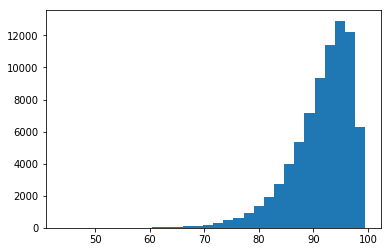

In [37]:
# Check the histogram and descriptives of credit rating
plt.hist(churn_df.credit_rating, bins=30)
churn_df.credit_rating.describe()

In [74]:
no_credit_rating = churn_df[churn_df.credit_rating.isna()]
no_profession = churn_df[churn_df.profession.isna()]
yes_credit_rating = churn_df[churn_df.credit_rating.notna()]
yes_profession = churn_df[churn_df.profession.notna()]

# z, pvalue = ztest(no_credit_rating['size_household'], yes_credit_rating['size_household'])

# print(z)
# print(pvalue)

for col in churn_df.columns:   
    if(churn_df[col].dtype != "object"):
        if col != "credit_rating":
            r, pval = ztest(no_credit_rating[col], yes_credit_rating[col])
            if pval<0.05:
                print("SIGNIFICANT DIFFERENCES ON {} FOR CUSTOMERS WITH AND WITHOUT A CREDIT RATING".format(col))
            else:
                print("No issues with {} for customers with and without a credit rating".format(col))
        
        r, pval = ztest(no_profession[col], yes_profession[col])
        if pval<0.05:
            print("SIGNIFICANT DIFFERENCES ON {} FOR CUSTOMERS WITH AND WITHOUT A KNOWN PROFESSION".format(col))
        else:
            print("No issues with {} for customers with and without a known profession".format(col))

No issues with size_household for customers with and without a credit rating
No issues with size_household for customers with and without a known profession
No issues with credit_rating for customers with and without a known profession
SIGNIFICANT DIFFERENCES ON no_credit_rating_flag FOR CUSTOMERS WITH AND WITHOUT A CREDIT RATING
No issues with no_credit_rating_flag for customers with and without a known profession
No issues with main_account_flag for customers with and without a credit rating
No issues with main_account_flag for customers with and without a known profession
No issues with online_banking_flag for customers with and without a credit rating
No issues with online_banking_flag for customers with and without a known profession
No issues with tele_banking_flag for customers with and without a credit rating
No issues with tele_banking_flag for customers with and without a known profession
No issues with creditcard_flag for customers with and without a credit rating
No issues 

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/weightstats.py:655: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


In [91]:
churn_df.dtypes!= "object"

contract_start                        object
contract_end                          object
date_of_birth                         object
gender                                object
profession                            object
size_household                         int64
ZIP                                   object
segment                               object
credit_rating                        float64
no_credit_rating_flag                  int64
main_account_flag                      int64
online_banking_flag                    int64
tele_banking_flag                      int64
creditcard_flag                        int64
insurance_life_flag                    int64
insurance_house_flag                   int64
insurance_car_flag                     int64
insurance_other_flag                   int64
mortgage_flag                          int64
portfolio_flag                         int64
last_balance                         float64
last_balance_minus_6_months          float64
last_balan

Pick one of the following actions:

* Keep variable as is
* Remove variable
* Impute with median
* Encode missing values as a specific value

#### Profession
Contrains the description of the profession of a customer.

In [38]:
# Check the values that can appear in the profession column
churn_df.profession.value_counts()

Journalism                3780
Other                     1963
Food Service              1960
Maint                     1954
Retiree                   1941
Insurance                 1940
Design                    1937
Health Care               1931
Telecommunications        1925
Retail                    1919
Admin & Clerical          1918
Real Estate               1912
Purchasing                1907
Information Technology    1907
Accounting                1907
Procurement               1906
Customer Service          1905
General Business          1905
Sales                     1901
Hospitality               1898
Marketing                 1898
Transportation            1896
Business Development      1895
Media                     1890
Finance                   1889
Construction              1885
Management                1883
Engineering               1883
Hotel                     1882
Science                   1878
Automotive                1874
Grocery                   1871
Governme

In [41]:
# Check the values that can appear in the contract_end column
churn_df.contract_end.value_counts()

13/01/2018    23
20/02/2017    22
05/09/2017    21
12/01/2018    21
17/06/2017    21
              ..
10/03/2017     6
01/10/2017     6
01/11/2017     5
05/02/2017     5
31/12/2017     4
Name: contract_end, Length: 365, dtype: int64

Pick one of the following actions:

* Keep variable as is
* Remove variable
* Impute with mode (most frequent value)
* Encode missing values as separate category

### Apply cleaning steps
Fill in the variable names for each outlier treatment step based on your decision above.

In [42]:
# Remove variable from dataset
churn_df = churn_df.drop(columns='contract_end') # Real reason to remove is that it is actually tied directly to the churn indicator. If you have this value, you churned.

count    100002.000000
mean         91.772536
std           5.020082
min          43.720633
25%          90.116320
50%          92.778048
75%          94.865077
max          99.495558
Name: credit_rating, dtype: float64

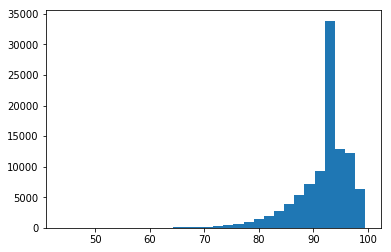

In [43]:
# Impute variable with the median value of the non NA entries
median = churn_df['credit_rating'].median()
churn_df['credit_rating'] = churn_df['credit_rating'].fillna(median) # Ignores the fact that credit_ratings are a normalized model, and that a bank should not be missing this field
plt.hist(churn_df.credit_rating, bins=30)
churn_df.credit_rating.describe()

In [ ]:
# Impute variable with the mode value (the most frequent value) of the non NA entries
# mode = churn_df['?????'].mode()
# churn_df['?????'] = churn_df['?????'].fillna(mode)

In [40]:
# Codify missing values as a separate category ("unknown")
churn_df['profession'] = churn_df['profession'].fillna('Unknown')
churn_df.profession.value_counts()

Unknown                   7729
Journalism                3780
Other                     1963
Food Service              1960
Maint                     1954
Retiree                   1941
Insurance                 1940
Design                    1937
Health Care               1931
Telecommunications        1925
Retail                    1919
Admin & Clerical          1918
Real Estate               1912
Accounting                1907
Information Technology    1907
Purchasing                1907
Procurement               1906
Customer Service          1905
General Business          1905
Sales                     1901
Hospitality               1898
Marketing                 1898
Transportation            1896
Business Development      1895
Media                     1890
Finance                   1889
Construction              1885
Engineering               1883
Management                1883
Hotel                     1882
Science                   1878
Automotive                1874
Grocery 

# Well done!